In [1]:
# movies.csv: https://www.kaggle.com/datasets/danielgrijalvas/movies

# Description: ~7000 movies from IMDB

# Motivation: What makes a movie "good"?

# General Flow:
# Load in Dataset
# Transform Dataset
# Looking at the columns, brainstorm possible relationship ideas

# Look at average rating over time
# Possible relationship between year and rating

# Look at average rating for each genre
# Possible relationship between genre and rating

# Look at certificate vs rating
# Possible relationship between certificate and rating

# Look at runtime vs rating
# Possible relationship between runtime and rating

# Hypothesize a linear relationship
# Run regression on dataset looking for that linear relationship
# Conclude results

# Use relationship for prediction for upcoming movies

In [2]:
# All imports for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
# Loading in the dataset into a Pandas Dataframe named movie_data

movie_data = pd.read_csv("movies.csv")

movie_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Text(0.5, 1.0, 'Histogram of Movie Ratings')

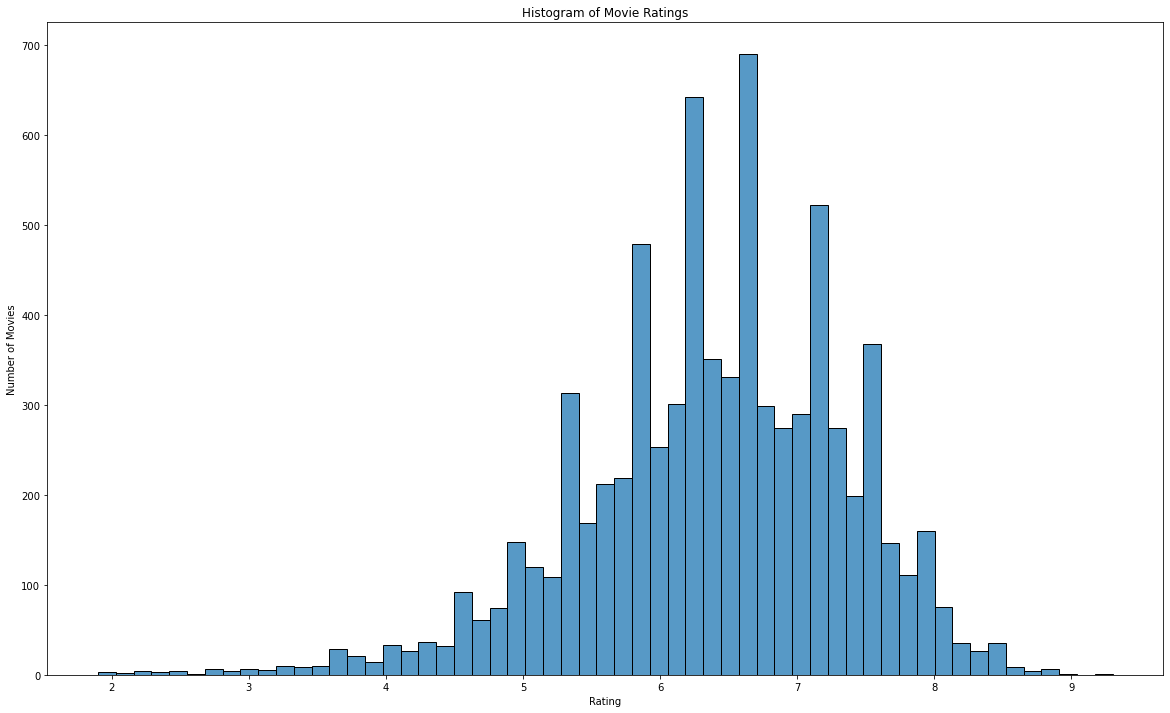

In [4]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(movie_data["score"])
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Movies')
ax.set_title('Histogram of Movie Ratings')

Text(0.5, 1.0, 'Scatter Plot of Average IMDB Score Over Time')

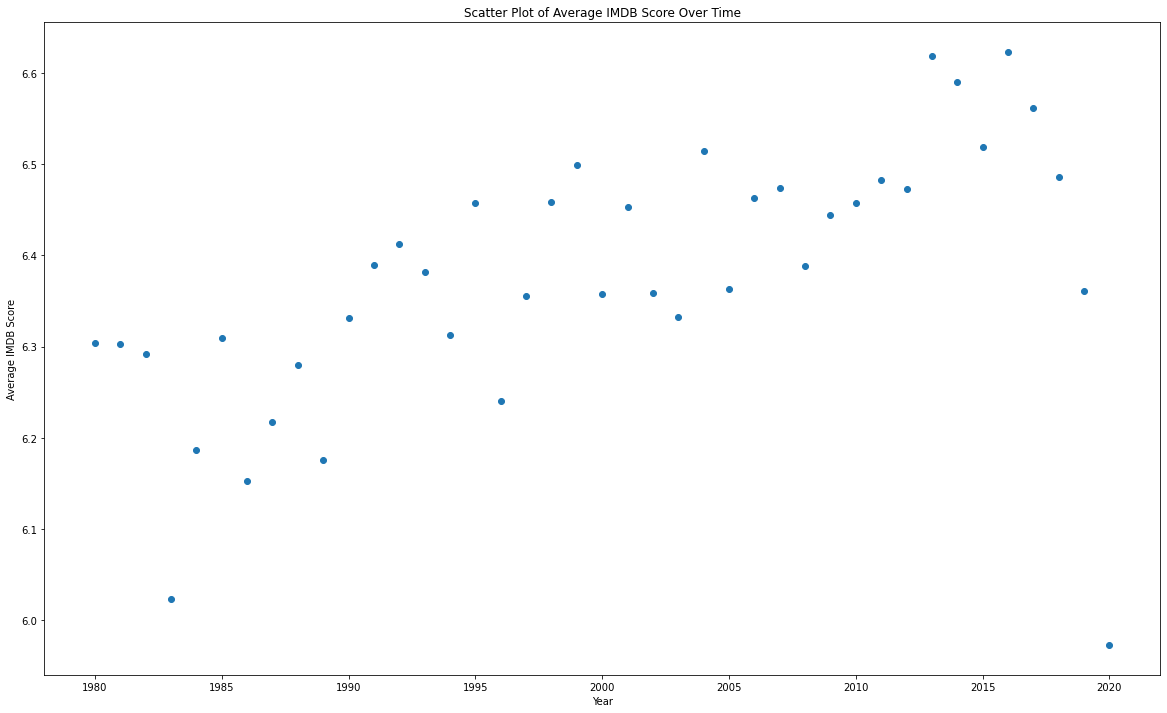

In [5]:
# Taking a look at average rating vs year

average_rating_per_year = movie_data.groupby("year")["score"].mean()
fig, ax1 = plt.subplots(figsize=(20,12))
ax1.scatter(average_rating_per_year.index, average_rating_per_year.values)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average IMDB Score")
ax1.set_title("Scatter Plot of Average IMDB Score Over Time")

Text(0.5, 1.0, 'Violin Plot of IMDB Score by Main Genre')

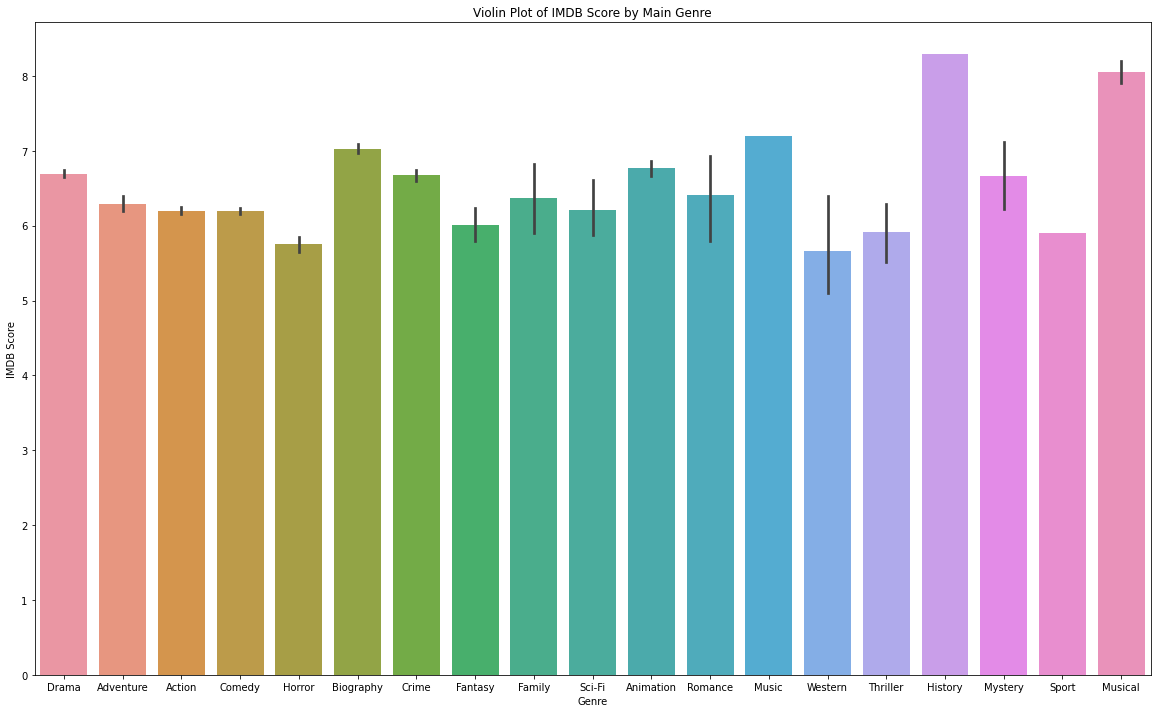

In [6]:
fig, ax2 = plt.subplots(figsize=(20,12))
sns.barplot(data=movie_data, x="genre", y="score")
ax2.set_xlabel("Genre")
ax2.set_ylabel("IMDB Score")
ax2.set_title("Violin Plot of IMDB Score by Main Genre")

Text(0.5, 1.0, 'Bar Plot of Average IMDB Score by Rating')

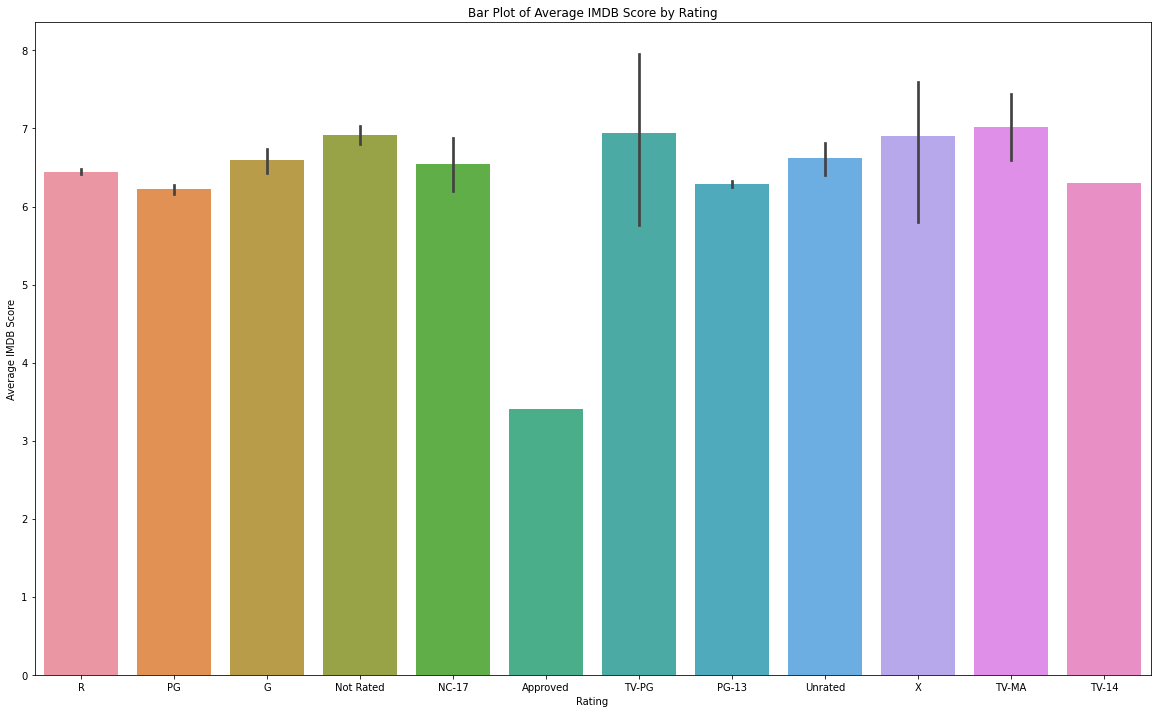

In [7]:
fig, ax3 = plt.subplots(figsize=(20,12))
sns.barplot(data=movie_data, x="rating", y="score")
ax3.set_xlabel("Rating")
ax3.set_ylabel("Average IMDB Score")
ax3.set_title("Bar Plot of Average IMDB Score by Rating")

Text(0.5, 1.0, 'Bar Plot of Average IMDB Score by Runtime')

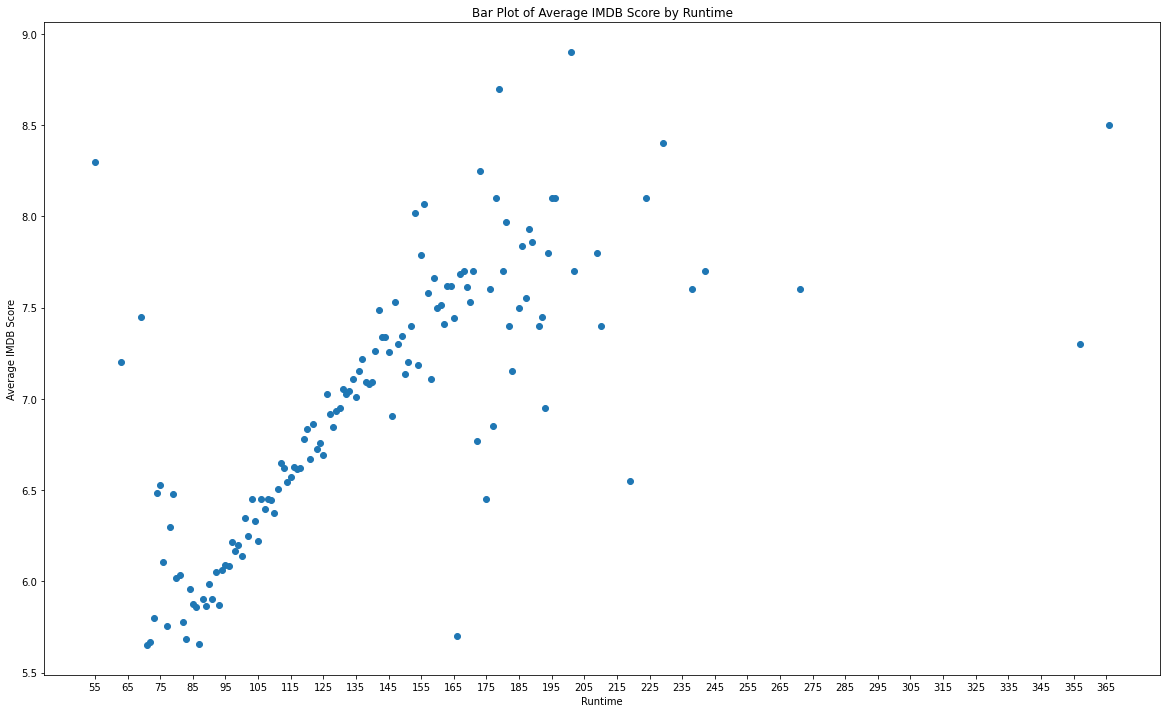

In [8]:
average_rating_per_year = movie_data.groupby("runtime")["score"].mean()
fig, ax4 = plt.subplots(figsize=(20,12))
ax4.scatter(average_rating_per_year.index, average_rating_per_year.values)
ax4.set_xticks(np.arange(float(min(movie_data["runtime"])), float(max(movie_data["runtime"])), 10.0))
ax4.set_xlabel("Runtime")
ax4.set_ylabel("Average IMDB Score")
ax4.set_title("Bar Plot of Average IMDB Score by Runtime")

Text(0.5, 1.0, 'Scatter Plot of Gross vs IMDB Rating')

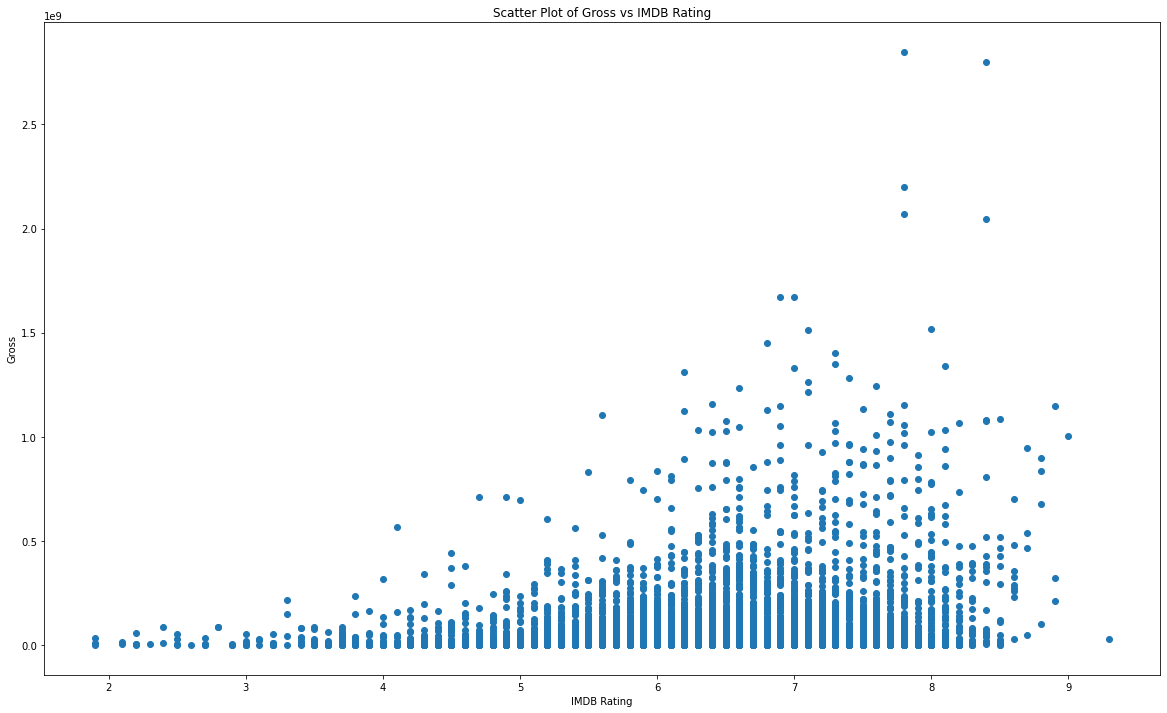

In [9]:
fig, ax5 = plt.subplots(figsize=(20,12))
ax5.scatter(movie_data["score"], movie_data["gross"])
ax5.set_xlabel("IMDB Rating")
ax5.set_ylabel("Gross")
ax5.set_title("Scatter Plot of Gross vs IMDB Rating")

In [10]:
# Looks like year made, genre, and runtime have an effect on IMDB rating.
# Now we use regression with those and see